<a href="https://colab.research.google.com/github/Divya-d14/Content-Strategy-and-Market-Expansion-Analysis-for-Netflix/blob/main/NetflixCasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Content Strategy and Market Expansion Analysis for Netflix**

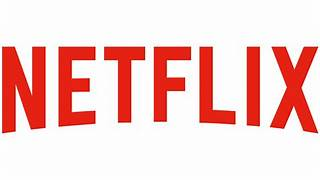

**About Netflix:**
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021 they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem Statement:**

Analyze the data and generate insights that could help Netflix in deciding
-  **which type of shows/movies to produce** and
-  **how they can grow the business in different countries**

**DataSet:**

The dataset consists of a list of all the TV shows/movies available on Netflix as of 2021:

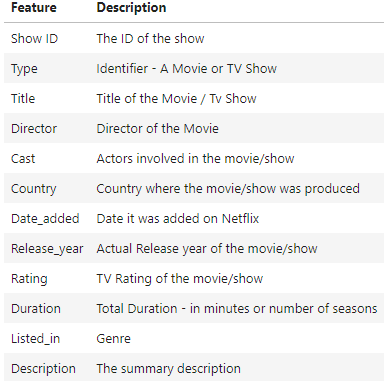

In [240]:
#importing basic libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [241]:
df = pd.read_csv('netflix.csv')
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6409,s6410,Movie,Camera Store,Scott Marshall Smith,"John Larroquette, John Rhys-Davies, Paul Ben-V...",United States,"August 20, 2017",2016,TV-MA,104 min,"Comedies, Dramas",With the digital revolution just around the co...
6275,s6276,TV Show,Behind the Newsroom,NaN,"Pok Piyatida Woramusik, Willie Ruengrit McInto...",NaN,"September 14, 2018",2015,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Confident and cool under pressure, top news pr..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4399,s4400,TV Show,Warrior,NaN,"Dar Salim, Danica Curcic, Lars Ranthe, Marco I...",Denmark,"November 13, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A war veteran plagued by guilt over his final ...
8577,s8578,Movie,This Was Tomorrow,Wim Bonte,NaN,Belgium,"December 15, 2015",2015,NR,77 min,"Documentaries, International Movies, Music & M...",The Tomorrowland music festival marks its 10th...


## **Data Understanding and Data Cleaning**

In [242]:
df.shape

(8807, 12)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [244]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [245]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [246]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [247]:
df.describe(include=object)

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


### **Initial Analysis**

   - There are 8,807 unique show IDs and titles, meaning every title in the dataset is unique.
   - The dataset includes both **Movies** and **TV Shows**, with **Movies** being the dominant type (6,131 entries), representing around 70% of the total content.
   - There are 4,528 unique directors, indicating a broad diversity of filmmakers.
   - The most frequent director is **Rajiv Chilaka**, who directed 19 titles.
   - The content comes from 748 unique countries, but **the United States** dominates, producing content for over 2,818 titles, representing about 35% of the total dataset.
   - The most frequent rating is **TV-MA** (mature audience), appearing in 3,207 titles, showing a significant portion of content is aimed at adults.
   - Content is categorized into 514 unique genres or combinations of genres, with **Dramas and International Movies** being the most frequently listed genres (appearing in 362 titles).

In [248]:
#DATA CLEANING OR MAKING DATA CONSISTENT

df.isnull().mean()*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,1.112751
release_year,0.000000
rating,0.045418
duration,0.034064


In [249]:
df['director'].fillna('Unknown', inplace=True)  #filling null values with 'Unknown' since the director and actor can not be imputed from the data available
df['cast'].fillna('Unknown', inplace=True)

In [250]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of country for the director and imputes in place of nulls of the corresponding mode

for i in df[df['country'].isnull()]['director'].unique(): # all the places where corresponding country is missing for a director
  if i in df[~df['country'].isnull()]['director'].unique():
    imp=df[df['director']==i]['country'].mode().values[0]
    df.loc[df['director']==i,'country']=df.loc[df['director']==i,'country'].fillna(imp)

#similarly on basis of actors
for i in df[df['country'].isnull()]['cast'].unique():
  if i in df[~df['country'].isnull()]['cast'].unique():
    imp=df[df['cast']==i]['country'].mode().values[0]
    df.loc[df['cast']==i,'country']=df.loc[df['cast']==i,'country'].fillna(imp)

#if still unknown
df['country'].fillna('Unknown', inplace=True)

In [251]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls of the corresponding mode

for i in df[df['date_added'].isnull()]['release_year'].unique():
  imp=df[df['release_year']==i]['date_added'].mode().values[0]
  df.loc[df['release_year']==i,'date_added']=df.loc[df['release_year']==i,'date_added'].fillna(imp)

In [252]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- The data in rating is inconsistent with values like 74min, 84min, 66min

In [253]:
#since the rating column data in min is most probably it's duration data, making it consistent
df.loc[df['duration'].isna(),'duration']=df['rating']

In [254]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [255]:
df.loc[df['rating'].str.contains('min', na=False), 'rating'] = 'NR'  #NoRating

In [256]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

In [257]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",United States,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [258]:
df.dropna(inplace=True)

In [259]:
df.isnull().mean()*100

,0
show_id,0.0
type,0.0
title,0.0
director,0.0
cast,0.0
country,0.0
date_added,0.0
release_year,0.0
rating,0.0
duration,0.0


In [260]:
df.duplicated().sum()

0

In [261]:
df.shape

(8803, 12)

In [262]:
#Unnesting of Director Column into another dataframe
df_director_r = pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])
df_director = df_director_r.stack().reset_index()
df_director.drop('level_1', axis = 1, inplace = True)
df_director.rename(columns ={0:'director'}, inplace = True)
df_director.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Unknown
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Unknown
4,Kota Factory,Unknown


In [263]:
#Unnesting of Cast Column into another dataframe
df_cast_r = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])
df_cast = df_cast_r.stack().reset_index()
df_cast.drop('level_1', axis = 1, inplace = True)
df_cast.rename(columns ={0:'cast'}, inplace = True)
df_cast.head()

,title,cast
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [264]:
#Unnesting of Country Column into another dataframe
df_country_r = pd.DataFrame(df['country'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])
df_country = df_country_r.stack().reset_index()
df_country.drop('level_1', axis = 1, inplace = True)
df_country.rename(columns ={0:'country'}, inplace = True)
df_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,France
3,Jailbirds New Orleans,United States
4,Kota Factory,India


In [265]:
#Unnesting of listed_in Column into another dataframe
df_listed_in_r = pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(',')).tolist(), index =df['title'])
df_listed_in = df_listed_in_r.stack().reset_index()
df_listed_in.drop('level_1', axis = 1, inplace = True)
df_listed_in.rename(columns ={0:'listed_in'}, inplace = True)
df_listed_in.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [266]:
df_new = df_director.merge(df_cast, on = 'title', how = 'inner')
df_new = df_new.merge(df_country, on = 'title', how = 'inner')
df_new = df_new.merge(df_listed_in, on = 'title', how = 'inner')

df_new.head()

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows


In [267]:
df_new.describe(include=object)

,title,director,cast,country,listed_in
count,202348,202348,202348,202348,202348
unique,8803,5120,39286,198,73
top,Kahlil Gibran's The Prophet,Unknown,Unknown,United States,International Movies
freq,700,50583,2149,55197,27223


In [268]:
df_new.isna().sum()

,0
title,0
director,0
cast,0
country,0
listed_in,0


In [269]:
df_final = df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration','description']] , how = 'inner', on = 'title')

df_final.sample(5)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
147009,Class of '61,Gregory Hoblit,Sophie Ward,United States,Dramas,s6494,Movie,2018-04-01,1993,TV-PG,91 min,"As the Civil War looms, a runaway slave seeks ..."
161393,InuYasha: The Movie 2: The Castle Beyond the L...,Toshiya Shinohara,Kenichi Ogata,Japan,International Movies,s7091,Movie,2017-09-01,2002,TV-14,99 min,"With their biggest foe seemingly defeated, Inu..."
38216,Funny Boy,Deepa Mehta,Seema Biswas,United States,LGBTQ Movies,s1564,Movie,2020-12-10,2020,TV-MA,109 min,"A student must navigate issues of sexuality, i..."
21816,Strain,Uduak-Obong Patrick,Gloria Anozie-Young,Unknown,International Movies,s857,Movie,2021-05-21,2020,TV-MA,107 min,When his son is diagnosed with sickle cell dis...
49562,Heidi,Unknown,Peter McAllum,Germany,Kids' TV,s2071,TV Show,2020-09-01,2020,TV-Y7,1 Season,A plucky young orphan sent to live with her gr...


In [270]:
df_final.isna().mean()*100

,0
title,0.0
director,0.0
cast,0.0
country,0.0
listed_in,0.0
show_id,0.0
type,0.0
date_added,0.0
release_year,0.0
rating,0.0


In [271]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202348 entries, 0 to 202347
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         202348 non-null  object        
 1   director      202348 non-null  object        
 2   cast          202348 non-null  object        
 3   country       202348 non-null  object        
 4   listed_in     202348 non-null  object        
 5   show_id       202348 non-null  object        
 6   type          202348 non-null  object        
 7   date_added    202348 non-null  datetime64[ns]
 8   release_year  202348 non-null  int64         
 9   rating        202348 non-null  object        
 10  duration      202348 non-null  object        
 11  description   202348 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [272]:
df_final.describe(include=object)

,title,director,cast,country,listed_in,show_id,type,rating,duration,description
count,202348,202348,202348,202348,202348,202348,202348,202348,202348,202348
unique,8803,5120,39286,198,73,8803,2,14,220,8771
top,Kahlil Gibran's The Prophet,Unknown,Unknown,United States,International Movies,s7165,Movie,TV-MA,1 Season,A troubled young girl and her mother find sola...
freq,700,50583,2149,55197,27223,700,146258,74052,34977,700


In [273]:
df_final['country'].unique()

array(['United States', 'South Africa', 'France', 'India', 'Unknown',
       ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'United Kingdom', 'Germany', ' Czech Republic',
       'Brazil', 'Mexico', 'Turkey', 'Australia', ' India', ' France',
       'Finland', 'China', ' Canada', ' United States', ' Japan',
       'Nigeria', 'Japan', 'Spain', 'Belgium', 'South Korea',
       ' Singapore', ' Israel', ' Australia', 'Philippines', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', ' Spain',
       'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Argentina', 'Egypt', 'Saudi Arabia', 'Thailand', 'Indonesia',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietn

In [274]:
df_final['country']=df_final['country'].str.strip()

In [275]:
df_final['country'].unique()

array(['United States', 'South Africa', 'France', 'India', 'Unknown',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Brazil', 'Mexico', 'Turkey', 'Australia',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Israel', 'Philippines',
       'Italy', 'Romania', 'Argentina', 'Venezuela', 'Hong Kong',
       'Russia', '', 'Ireland', 'Nepal', 'New Zealand', 'Greece',
       'Jordan', 'Colombia', 'Switzerland', 'Taiwan', 'Bulgaria',
       'Algeria', 'Poland', 'Egypt', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Denmark', 'Kuwait', 'Netherlands', 'Malaysia',
       'Vietnam', 'Hungary', 'Sweden', 'Lebanon', 'Syria', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'N

In [276]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [277]:
cat_var =['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'rating', 'duration']

for i in cat_var:
  df_final[i]=df_final[i].str.strip()

In [278]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [279]:
df_final['date_added'].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1698, dtype: datetime64[ns]

In [280]:
df_final.sample(5)

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
172845,Naruto Shippuden : Blood Prison,Masahiko Murata,Kosei Hirota,Japan,Action & Adventure,s7560,Movie,2017-09-01,2011,TV-14,102 min,Mistakenly accused of an attack on the Fourth ...
33777,Fatima,Marco Pontecorvo,Sonia Braga,United States,Faith & Spirituality,s1367,Movie,2021-01-31,2020,PG-13,113 min,"In 1917 Portugal, visions of the Virgin Mary c..."
24709,Legal Hash,Rindala Kodeih,Rita Harb,Unknown,Comedies,s988,Movie,2021-04-23,2019,TV-MA,103 min,After a failed heist leads to a stint behind b...
160059,Hurricane Bianca: From Russia With Hate,Matt Kugelman,Rachel Dratch,United States,LGBTQ Movies,s7032,Movie,2018-08-15,2018,TV-MA,85 min,When Texas teacher Richard is lured to Russia ...
121156,Terrace House: Aloha State,Unknown,Azusa Babazono,Japan,Reality TV,s5263,TV Show,2017-09-26,2017,TV-14,4 Seasons,The beautiful island of Oahu is host to a new ...


In [281]:
df_final.shape

(202348, 12)

In [282]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

## **Data Analysis**

### **NonGraphical and Graphical Analysis of Variables**

In [283]:
df_final.columns

Index(['title', 'director', 'cast', 'country', 'listed_in', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description'],
      dtype='object')

In [284]:
df_final.groupby('type')['title'].nunique()

,title
type,
Movie,6128
TV Show,2674


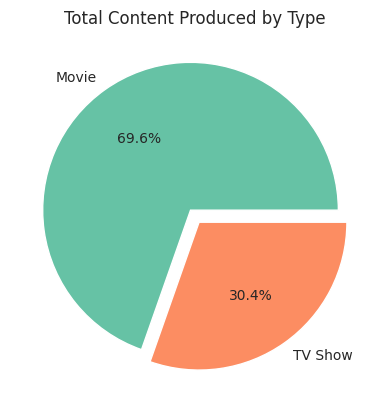

In [285]:
set2_colors = sns.color_palette('Set2', 20)
df_type = df_final.groupby('type')['title'].nunique().reset_index()
plt.pie(df_type['title'], explode=(0.05,0.05),labels=df_type['type'], autopct='%1.1f%%', colors=set2_colors)
plt.title('Total Content Produced by Type')
plt.show()

It is 70:30 when it comes to Movies and Tv Shows

In [286]:
df_final.groupby('country')['title'].nunique().sort_values(ascending=False)

,title
country,
United States,4180
India,1105
United Kingdom,815
Canada,450
France,398
...,...
Kazakhstan,1
Jamaica,1
Slovakia,1


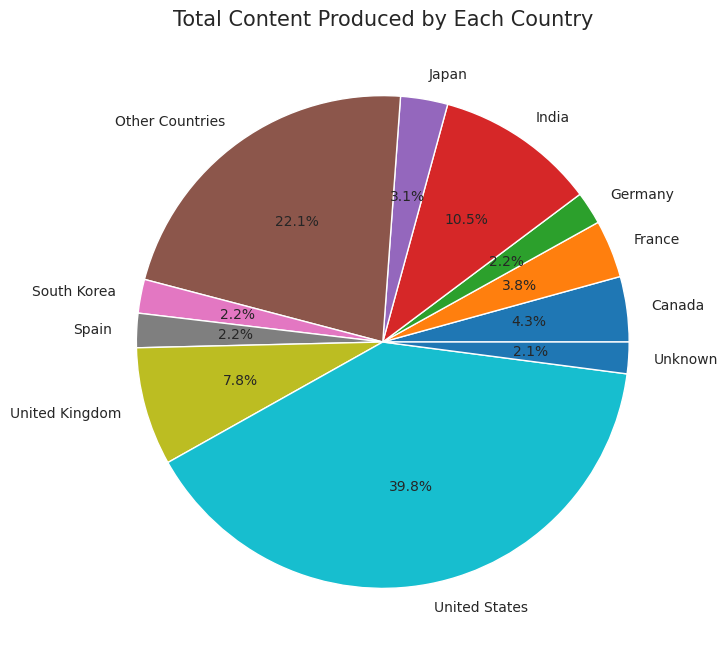

In [287]:
# Get the top 10 countries based on title counts
top_10_countries = df_final['country'].value_counts().head(10).index

# Create a new column for categorized countries
df_final['country_t'] = df_final['country'].apply(lambda x: x if x in top_10_countries else 'Other Countries')

# Count the occurrences of each country, including 'Other Countries'
x = df_final.groupby('country_t')['title'].nunique()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.title('Total Content Produced by Each Country', fontsize=15)
plt.show()


Around 80% of content is from Top 10 countries

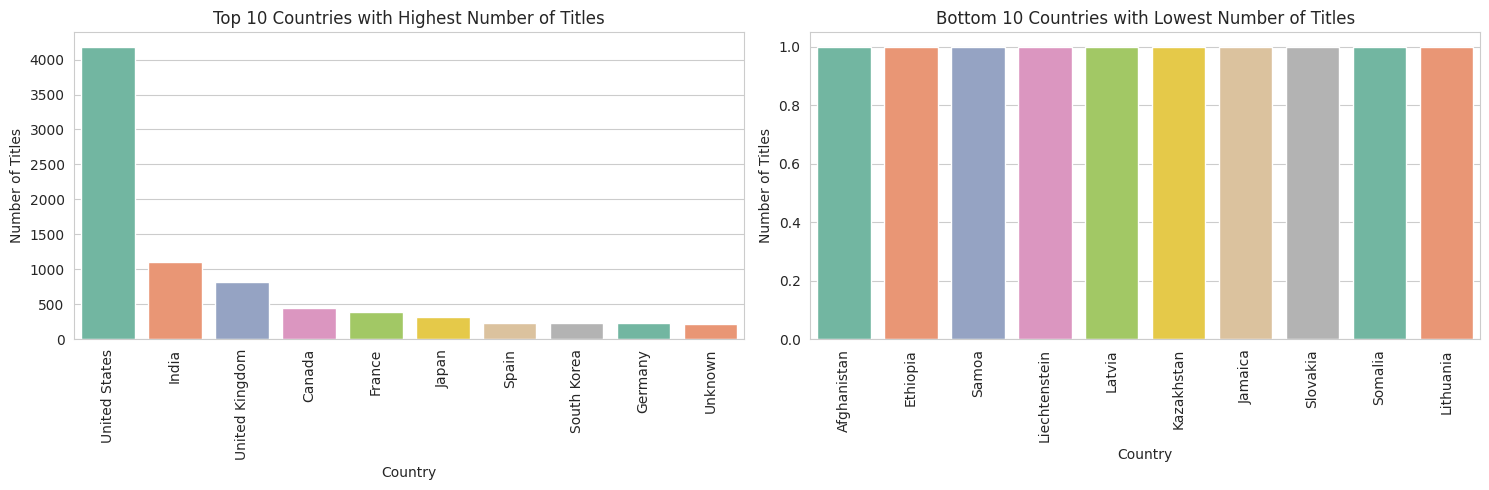

In [288]:
df_c_t = df_final.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
df_c_b = df_final.groupby('country')['title'].nunique().sort_values(ascending=False).tail(10)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df_c_t.index, y=df_c_t.values, palette='Set2')
plt.title('Top 10 Countries with Highest Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=df_c_b.index, y=df_c_b.values, palette='Set2')
plt.title('Bottom 10 Countries with Lowest Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

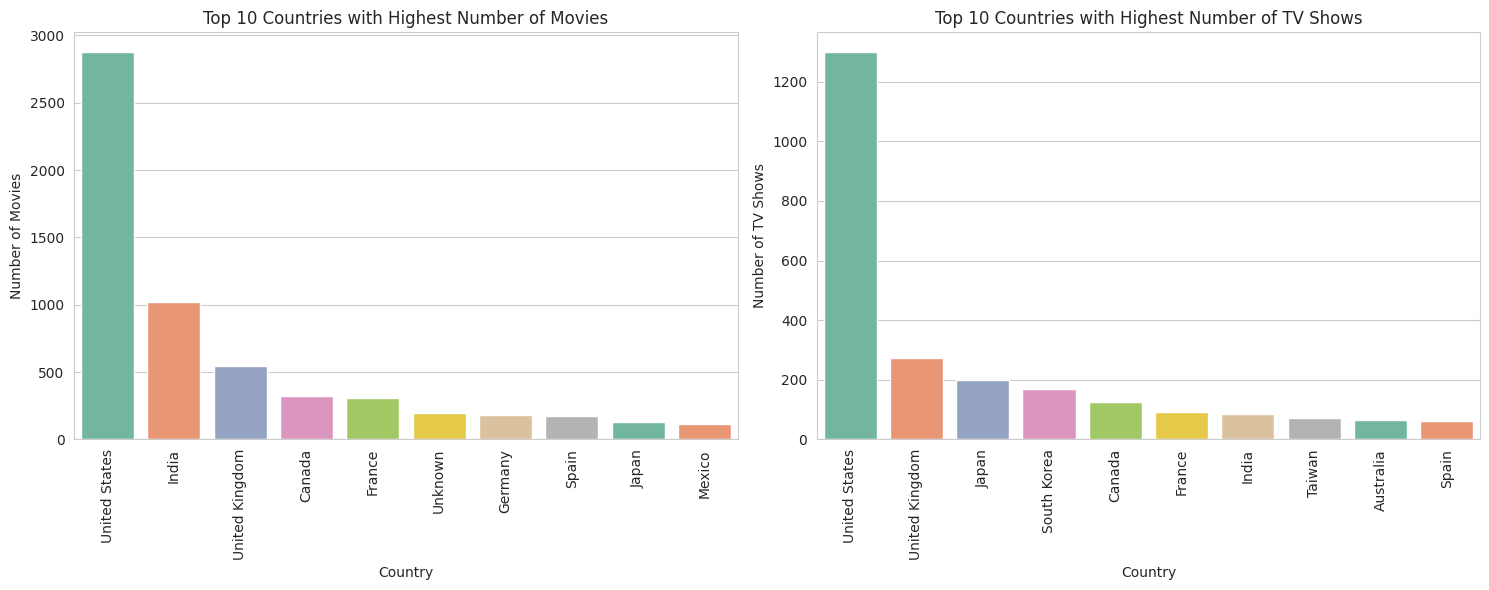

In [289]:
cm = df_final[df_final['type']=='Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
ct = df_final[df_final['type']=='TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.barplot(x=cm.index, y=cm.values, palette='Set2', ax=axes[0])
axes[0].set_title('Top 10 Countries with Highest Number of Movies')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Movies')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(x=ct.index, y=ct.values, palette='Set2', ax=axes[1])
axes[1].set_title('Top 10 Countries with Highest Number of TV Shows')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of TV Shows')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

- United States(American) Content is more in both Movies and Tv Shows followed by India and United Kingdom.

- Tv shows content from few countries like SouthKorea,Taiwan,Australia is more compared to it's  movies.

In [290]:
df_l =  df_final.groupby(['listed_in','type'])['title'].nunique().sort_values(ascending=False)
df_l

,,title
listed_in,type,
International Movies,Movie,2751
Dramas,Movie,2425
Comedies,Movie,1674
International TV Shows,TV Show,1350
Documentaries,Movie,869
Action & Adventure,Movie,859
TV Dramas,TV Show,763
Independent Movies,Movie,756
Children & Family Movies,Movie,641


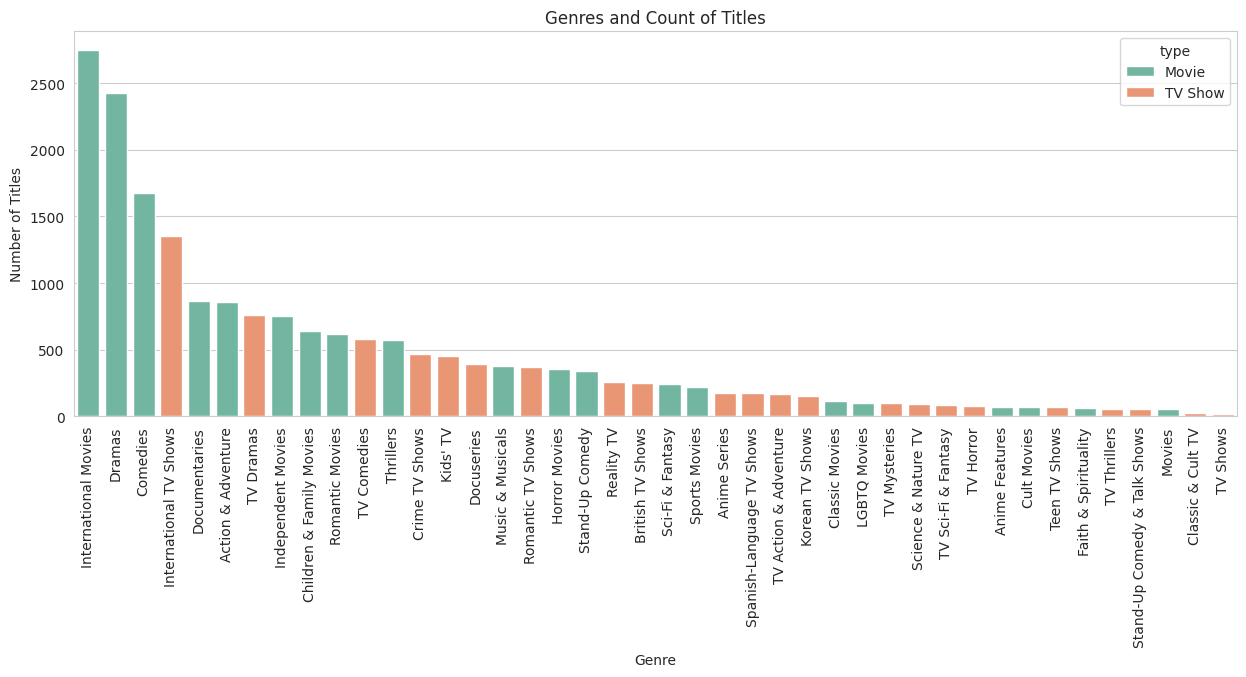

In [291]:

plt.figure(figsize=(15,5))
# Use df_l.index.get_level_values('type') to access the 'type' level of the MultiIndex
sns.barplot(x=df_l.index.get_level_values(0), y=df_l.values,palette='Set2',hue=df_l.index.get_level_values(1))
plt.title('Genres and Count of Titles')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

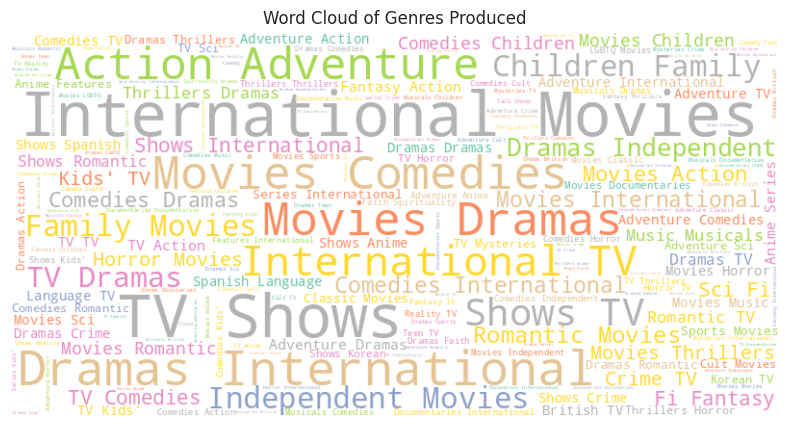

In [292]:
from wordcloud import WordCloud

# Step 1: Combine all genres into a single string
all_genres = ' '.join(df_final['listed_in'].dropna())  # Drop any NaN values

# Step 2: Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(all_genres)

# Step 3: Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Genres Produced')
plt.show()


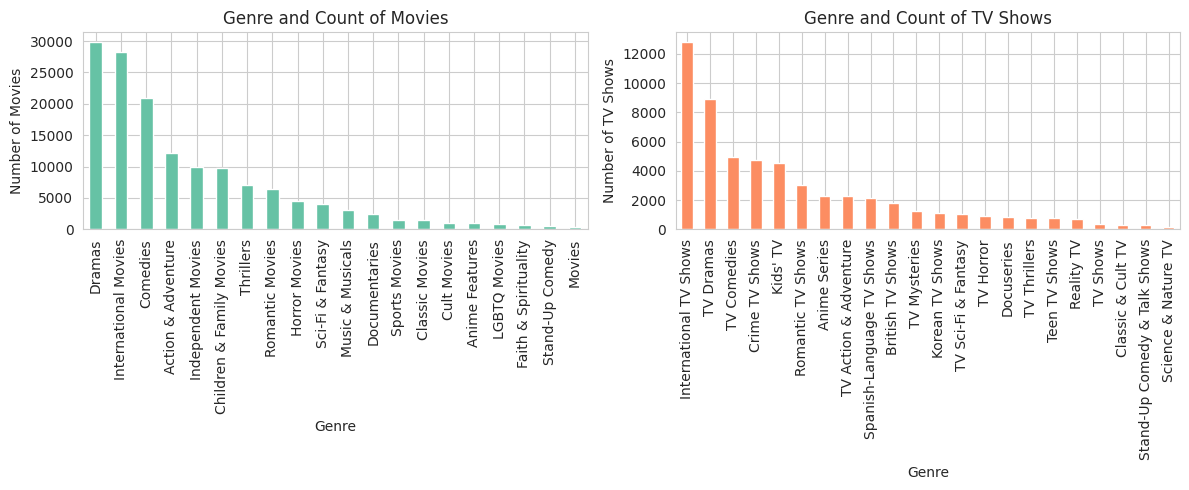

In [293]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
set2_colors = sns.color_palette('Set2', 2)
# Plot for Movies in the first subplot (left)
df_final[df_final['type'] == 'Movie'].groupby('listed_in')['title'].count().sort_values(ascending=False).plot(
    kind='bar', color=set2_colors[0], ax=axes[0])  # Set color to blue and assign to left subplot
axes[0].set_title('Genre and Count of Movies')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Number of Movies')

# Plot for TV Shows in the second subplot (right)
df_final[df_final['type'] == 'TV Show'].groupby('listed_in')['title'].count().sort_values(ascending=False).plot(
    kind='bar', color=set2_colors[1], ax=axes[1])  # Set color to orange and assign to right subplot
axes[1].set_title('Genre and Count of TV Shows')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Number of TV Shows')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


- International Movies,Dramas and Comedies are the most consuming Genres

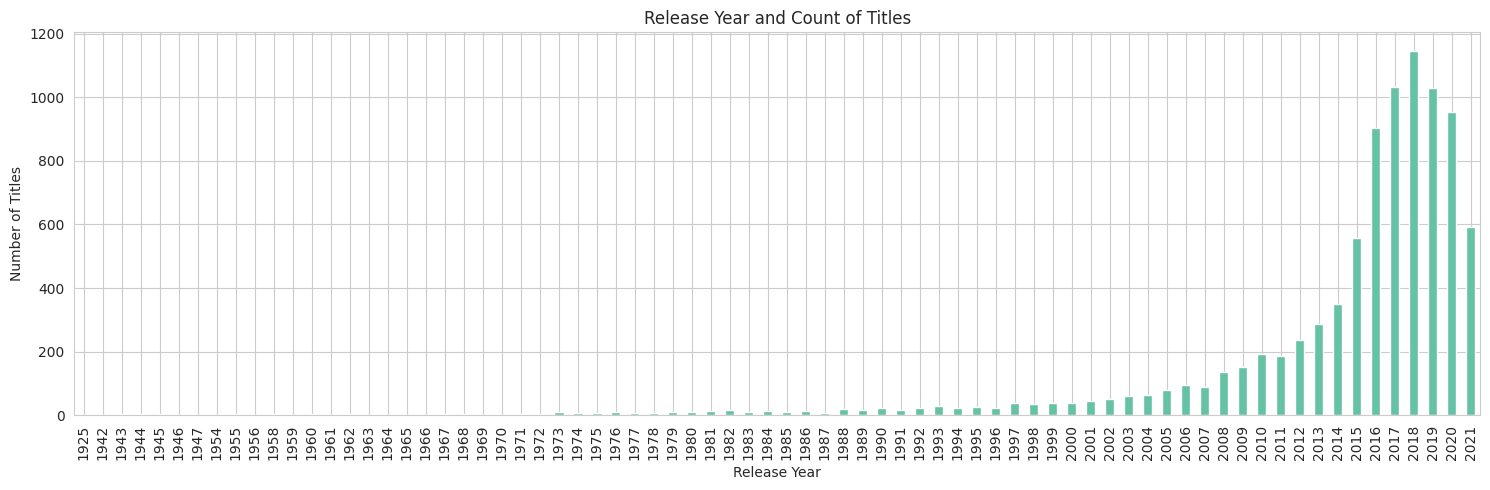

In [294]:
# Set the figure size
plt.figure(figsize=(15, 5))

# Get the Set2 color palette
set2_colors = sns.color_palette('Set2', n_colors=1)  # Use 1 color for a single-bar plot

# Plot the grouped data with proper color palette
df_final.groupby('release_year')['title'].nunique().plot(kind='bar', color=set2_colors[0])

# Add title and labels
plt.title('Release Year and Count of Titles')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')

# Display the plot
plt.tight_layout()
plt.show()


There is a significant increase of content after 2015 with a significant dip in 2021 ( may be due to low production of movies and tv shows due to pandemic)

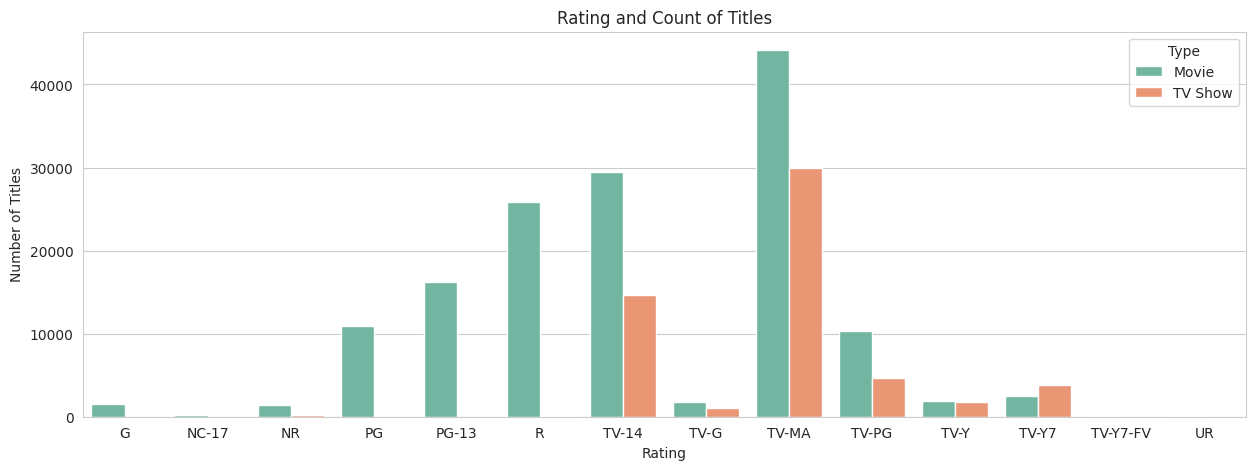

In [295]:
# Step 1: Group by rating and type to get counts
df_counts = df_final.groupby(['rating', 'type'])['title'].count().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x='rating', y='title', hue='type', data=df_counts, palette='Set2')

plt.title('Rating and Count of Titles')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()


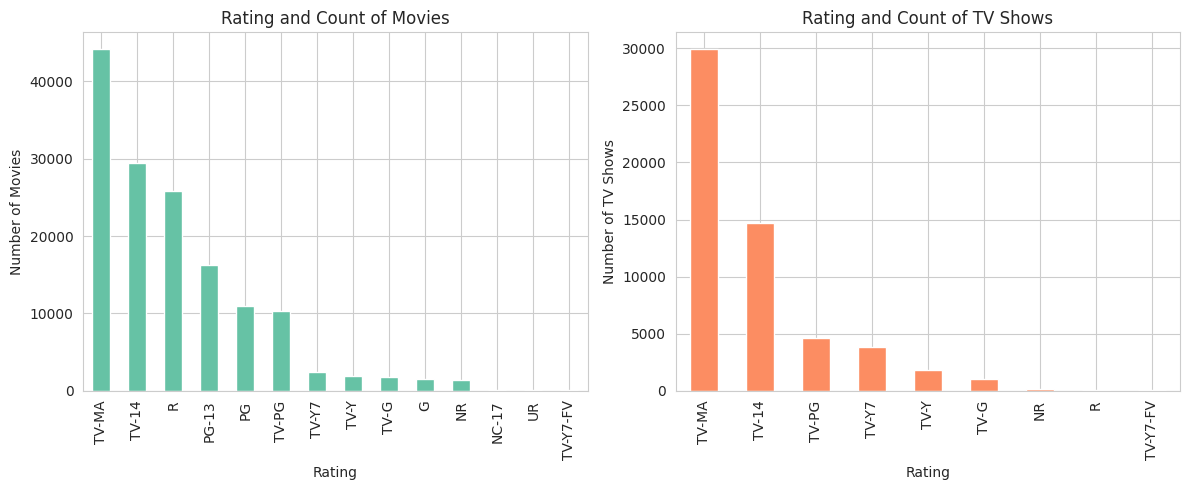

In [296]:
# Set the figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Get the Set2 color palette
set2_colors = sns.color_palette('Set2', 2)  # Fetch two colors for movies and TV shows

# Plot for Movies in the first subplot (left)
df_final[df_final['type'] == 'Movie'].groupby('rating')['title'].count().sort_values(ascending=False).plot(
    kind='bar', color=set2_colors[0], ax=axes[0])  # Set color from Set2
axes[0].set_title('Rating and Count of Movies')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Movies')

# Plot for TV Shows in the second subplot (right)
df_final[df_final['type'] == 'TV Show'].groupby('rating')['title'].count().sort_values(ascending=False).plot(
    kind='bar', color=set2_colors[1], ax=axes[1])  # Set color from Set2
axes[1].set_title('Rating and Count of TV Shows')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of TV Shows')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



Mature audience content and children above 14 content are highly present. More scope to increase the versatility of content to attract audience from different age groups

### **Comparision Of TV Shows and Movies**

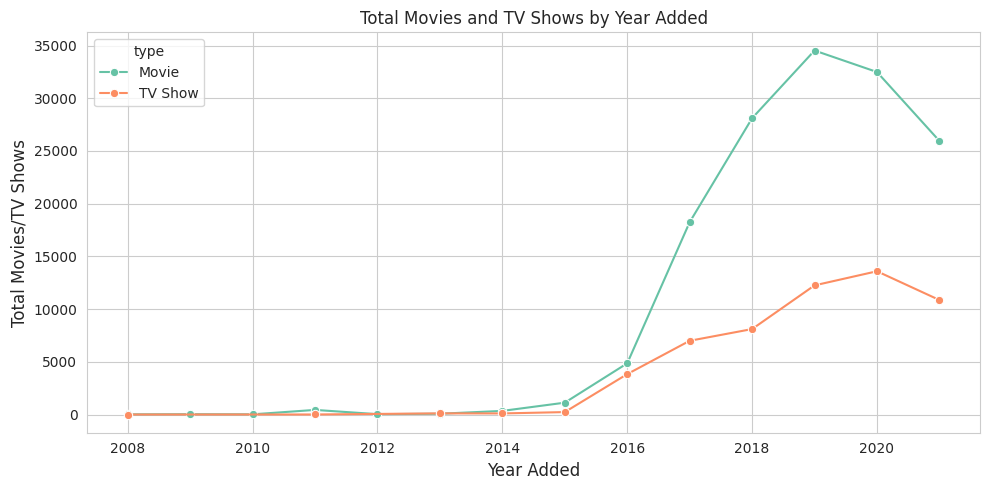

In [297]:
# Convert 'date_added' column to datetime
df_final['date_added'] = pd.to_datetime(df_final['date_added'])

# Group by year and type
d = df_final.groupby([df_final['date_added'].dt.year, 'type'])['title'].count().reset_index()
d.columns = ['year_added', 'type', 'title']  # Rename columns for clarity

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=d, x='year_added', y='title', hue='type', marker='o', ms=6, palette='Set2')

# Set labels and title
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Total Movies/TV Shows', fontsize=12)
plt.title('Total Movies and TV Shows by Year Added', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


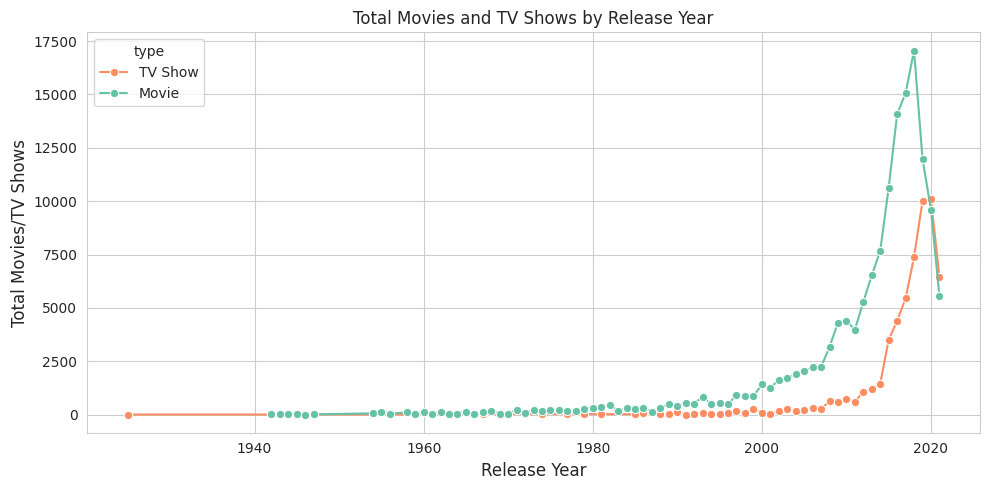

In [298]:
# Group by release year and type
r = df_final.groupby(['release_year', 'type'])['title'].count().reset_index()

# Create a custom palette with Movies as the first color and TV Shows as the second
custom_palette = sns.color_palette('Set2', 2)  # Get 2 colors from Set2
palette_dict = {'Movie': custom_palette[0], 'TV Show': custom_palette[1]}  # Map colors to types

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=r, x='release_year', y='title', hue='type', marker='o', ms=6, palette=palette_dict)

# Set labels and title
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Movies/TV Shows', fontsize=12)
plt.title('Total Movies and TV Shows by Release Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


- Content uploading started in 2008 with Minimal content until 2014.
- Significant surge in content in 2015
- Peak content addition in 2019
- Decline in 2020 and 2021
- Tv shows less affected than movies
- Show releases concentrated from 2005-2021


In [299]:
df_c = df_final.groupby(['director'])['title'].nunique().sort_values(ascending=False).head(20).reset_index()
df_c

,director,title
0,Unknown,2631
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


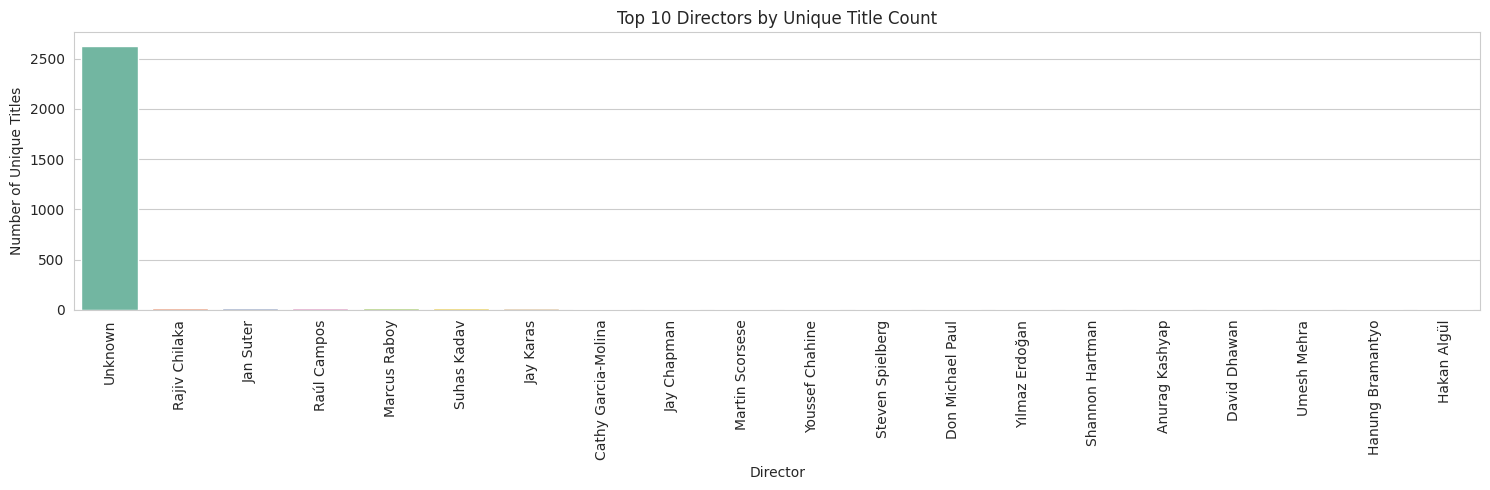

In [300]:
plt.figure(figsize=(15, 5))
sns.barplot(x='director', y='title', data=df_c, palette='Set2')
sns.set_style('whitegrid')
plt.title('Top 10 Directors by Unique Title Count')
plt.xlabel('Director')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [301]:
df_c = df_final.groupby(['cast'])['title'].nunique().sort_values(ascending=False).head(10).reset_index()
df_c

,cast,title
0,Unknown,825
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Akshay Kumar,30
8,Om Puri,30
9,Yuki Kaji,29


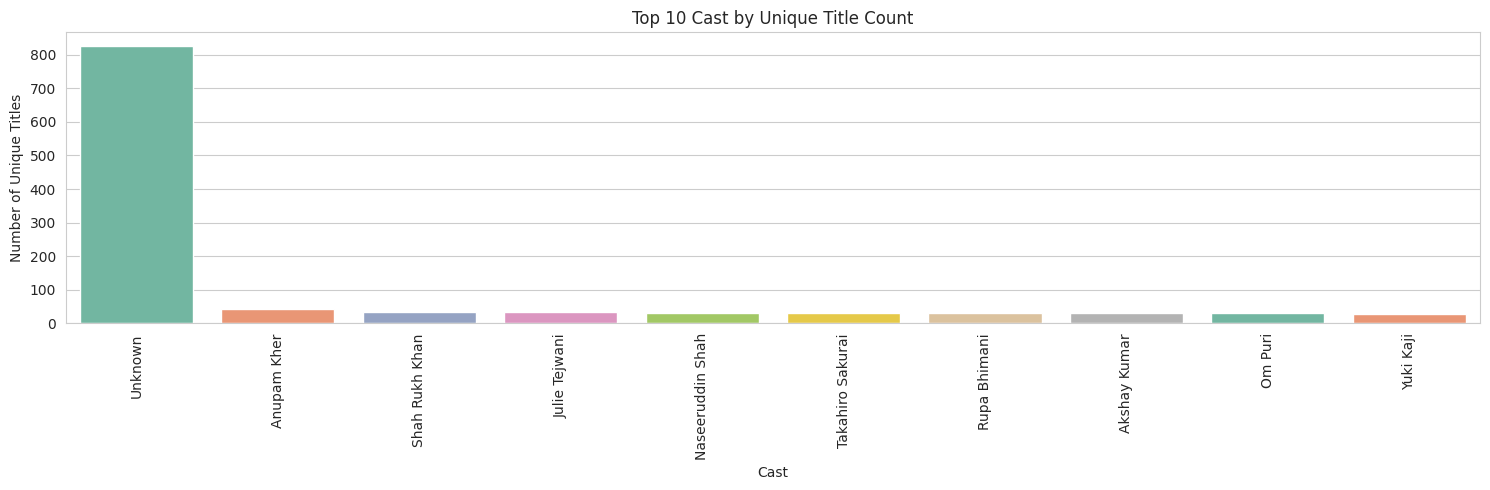

In [302]:
plt.figure(figsize=(15, 5))
sns.barplot(x='cast', y='title', data=df_c, palette='Set2')
sns.set_style('whitegrid')
plt.title('Top 10 Cast by Unique Title Count')
plt.xlabel('Cast')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


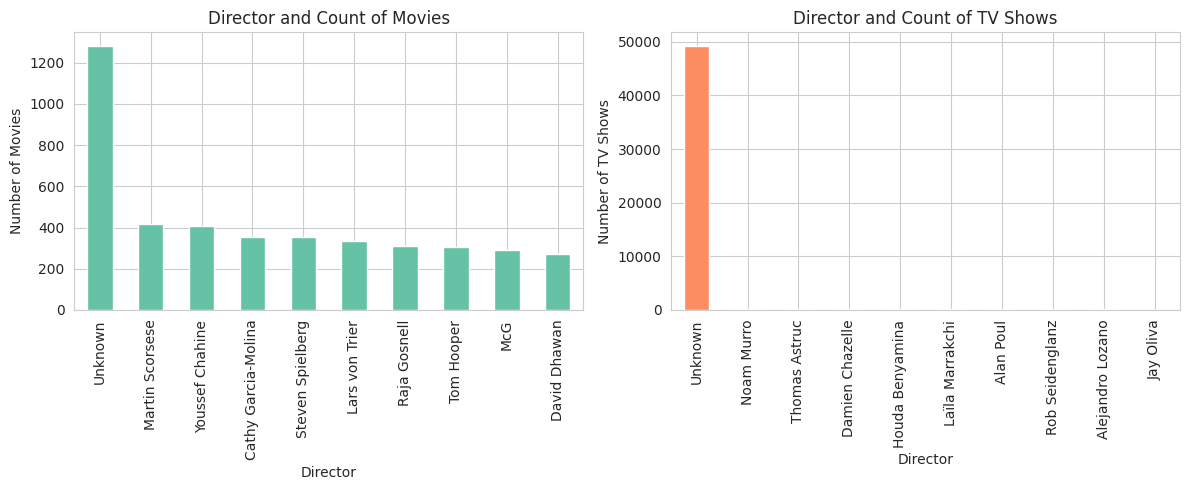

In [303]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
set2_colors = sns.color_palette('Set2', 2)
# Plot for Movies in the first subplot (left)
df_final[df_final['type'] == 'Movie'].groupby('director')['title'].count().sort_values(ascending=False).head(10).plot(
    kind='bar',  ax=axes[0], color=set2_colors[0])  # Set color to blue and assign to left subplot
axes[0].set_title('Director and Count of Movies')
axes[0].set_xlabel('Director')
axes[0].set_ylabel('Number of Movies')

# Plot for TV Shows in the second subplot (right)
df_final[df_final['type'] == 'TV Show'].groupby('director')['title'].count().sort_values(ascending=False).head(10).plot(
    kind='bar',  ax=axes[1], color=set2_colors[1])  # Set color to orange and assign to right subplot
axes[1].set_title('Director and Count of TV Shows')
axes[1].set_xlabel('Director')
axes[1].set_ylabel('Number of TV Shows')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### **Duration of movies preferred**

In [304]:
df_final['duration']=df_final['duration'].str.replace('min','')
df_final['duration']=df_final['duration'].str.strip()

In [305]:
df_final['duration_copy']=df_final['duration'].copy()
df_final=df_final.copy()
df_final.loc[df_final['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final['duration_copy']=df_final['duration_copy'].astype('int')
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,country_t,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,90
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,0
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,0
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,0
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,0


In [306]:
df_final['duration_copy'].describe()

,duration_copy
count,202348.000000
mean,77.221238
std,52.239410
min,0.000000
25%,0.000000
50%,95.000000
75%,112.000000
max,312.000000


In [307]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final['duration_copy'] = pd.cut(df_final['duration_copy'],bins=bins1,labels=labels1)
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,country_t,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",United States,80-100
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,<1
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,<1
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,<1
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries,<1


In [308]:
df_final.loc[~df_final['duration'].str.contains('Season'),'duration']=df_final.loc[~df_final['duration'].str.contains('Season'),'duration_copy']
df_final.drop(['duration_copy'],axis=1,inplace=True)
df_final.head()

,title,director,cast,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,country_t
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,80-100,"As her father nears the end of his life, filmm...",United States
1,Blood & Water,Unknown,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries
2,Blood & Water,Unknown,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries
3,Blood & Water,Unknown,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries
4,Blood & Water,Unknown,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Other Countries


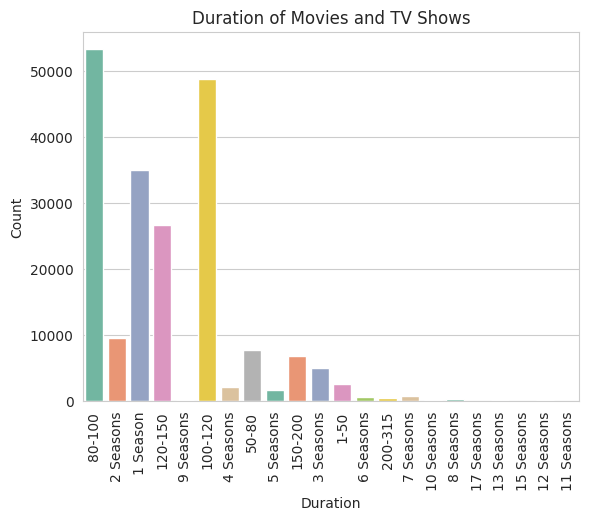

In [309]:
sns.countplot(x=df_final['duration'],palette='Set2')
plt.title('Duration of Movies and TV Shows')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Clearly Shorter duration of movies and tv shows are being preferred

### **What is the best time to launch TV Show or Movie**

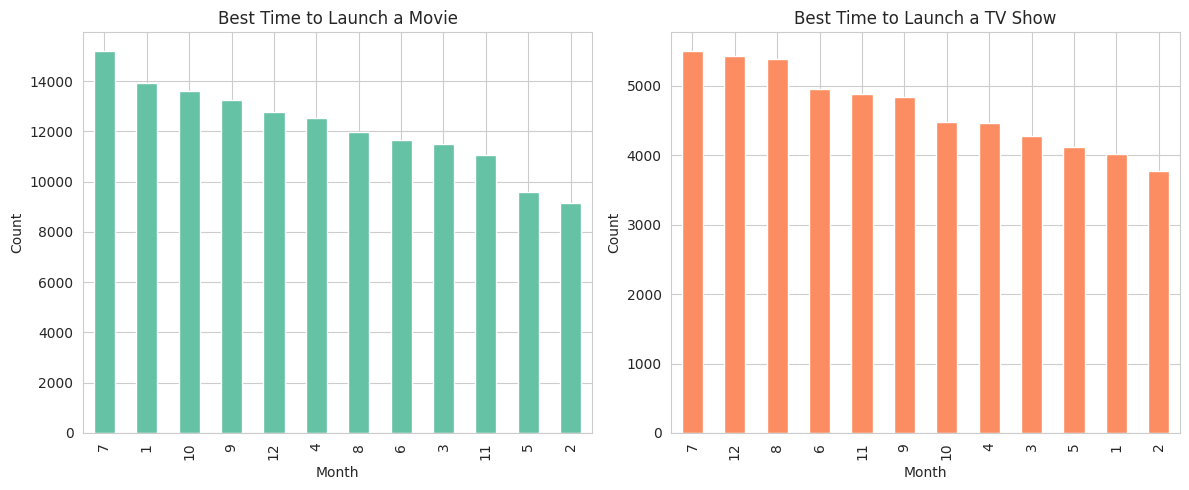

In [310]:
# What is the best time to launch a TV show or Movie?
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
set2_colors = sns.color_palette('Set2', 2)
# Plot for Movie
df_final[df_final['type'] == 'Movie'].groupby(df_final['date_added'].dt.month)['date_added'].count().sort_values(ascending=False).plot(kind='bar', color=set2_colors[0], ax=axes[0])
axes[0].set_title('Best Time to Launch a Movie')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Plot for TV Show
df_final[df_final['type'] == 'TV Show'].groupby(df_final['date_added'].dt.month)['date_added'].count().sort_values(ascending=False).plot(kind='bar', color=set2_colors[1], ax=axes[1])
axes[1].set_title('Best Time to Launch a TV Show')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


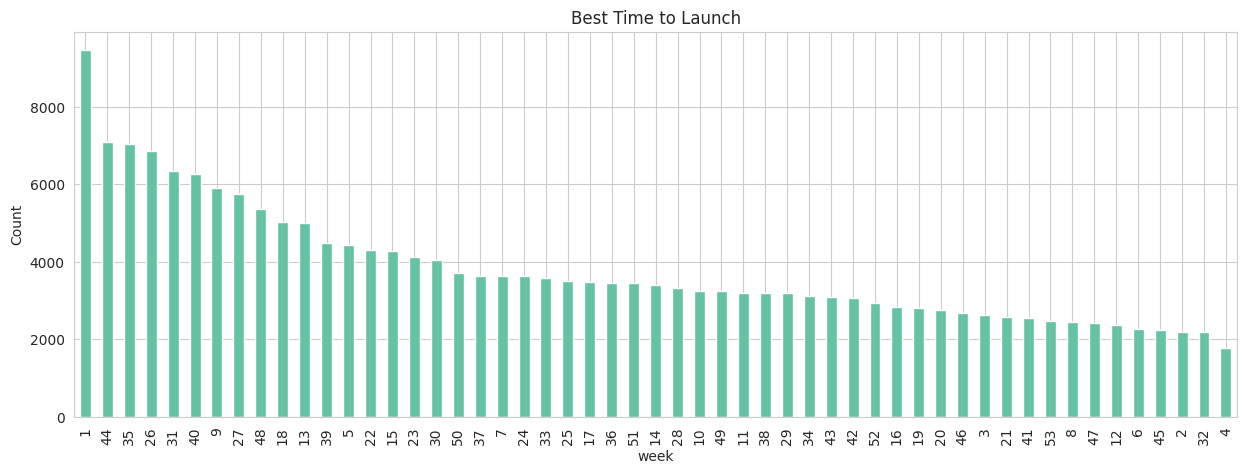

In [311]:
set2_colors = sns.color_palette('Set2', n_colors=1)
df_final.groupby(df_final['date_added'].dt.isocalendar().week)['date_added'].count().sort_values(ascending=False).plot(kind='bar', figsize=(15,5),color=set2_colors[0])
plt.title('Best Time to Launch')
plt.xlabel('week')
plt.ylabel('Count')
plt.show()

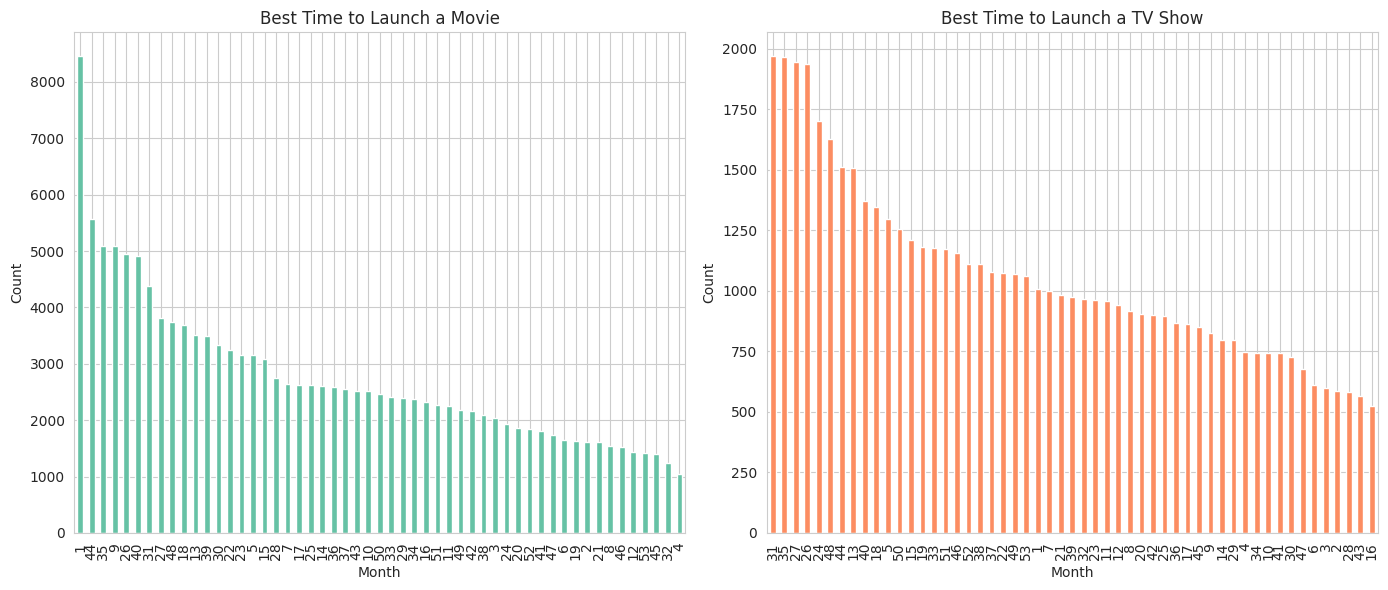

In [312]:
# What is the best time to launch a TV show or Movie?
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
set2_colors = sns.color_palette('Set2', 2)
# Plot for Movie
df_final[df_final['type'] == 'Movie'].groupby(df_final['date_added'].dt.isocalendar().week)['date_added'].count().sort_values(ascending=False).plot(kind='bar', color=set2_colors[0], ax=axes[0])
axes[0].set_title('Best Time to Launch a Movie')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Plot for TV Show
df_final[df_final['type'] == 'TV Show'].groupby(df_final['date_added'].dt.isocalendar().week)['date_added'].count().sort_values(ascending=False).plot(kind='bar', color=set2_colors[1], ax=axes[1])
axes[1].set_title('Best Time to Launch a TV Show')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


- The December/Christmas season is prime time for launching movies and TV shows, as people tend to have more leisure time during the holidays and are looking for entertainment. The festive spirit and the break from work or school make it an ideal period for high viewership and increased audience engagement.

- Mid-month releases can also be strategic. These periods often serve as a breather for audiences between major holidays or events, making them more receptive to fresh entertainment. Since people tend to look for something new to break the monotony during mid-months, it provides a great opportunity for content to gain traction.

### **Analysis of actors/directors of different types of shows/movies**

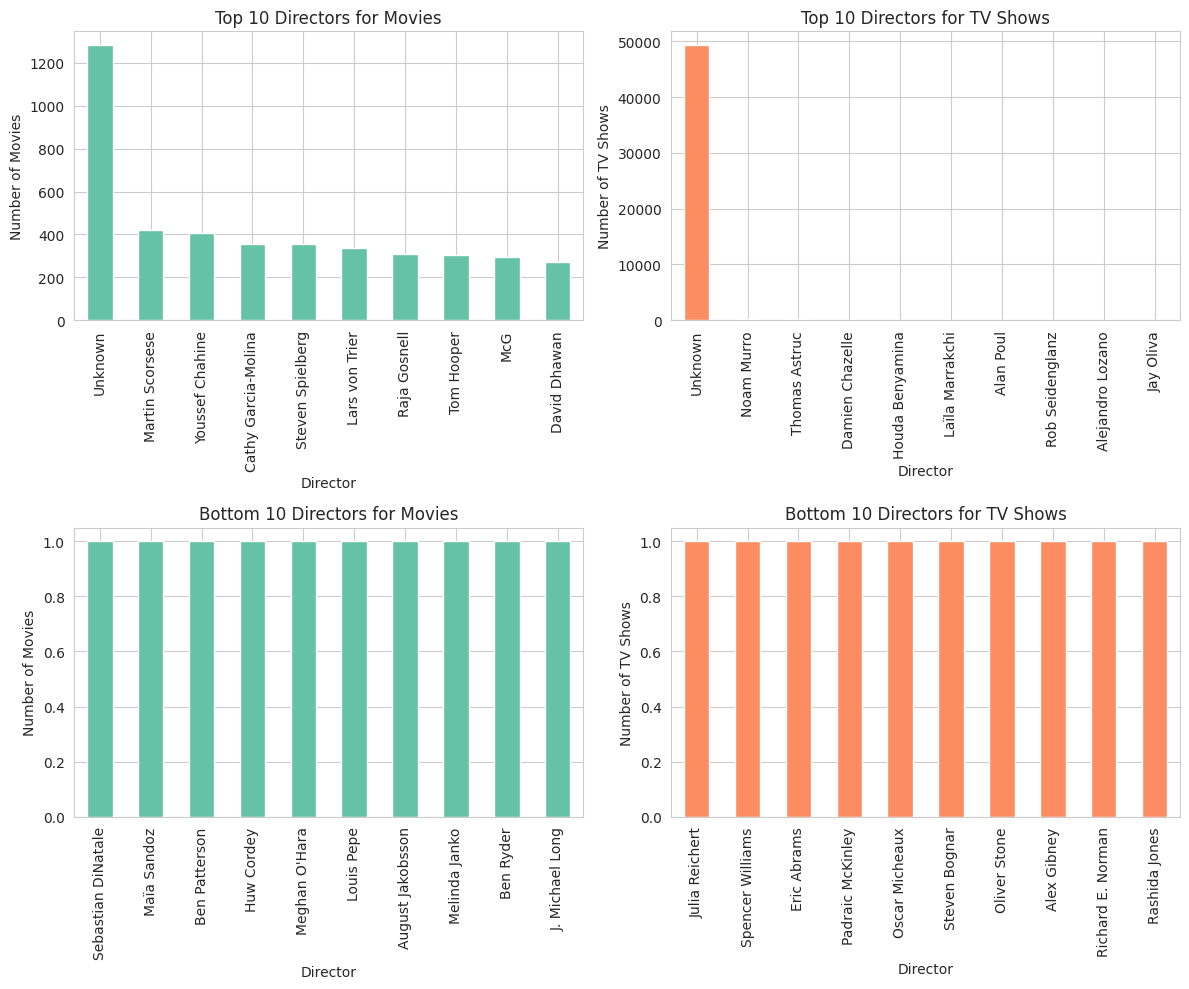

In [313]:
# Analysis of actors/directors of different types of shows/movies.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted height for better fit
set2_colors = sns.color_palette('Set2', 2)

# Top 10 Directors for Movies
top10moviedirectors = df_final[df_final['type'] == 'Movie'].groupby('director')['title'].count().sort_values(ascending=False).head(10)
top10moviedirectors.plot(kind='bar', color=set2_colors[0], ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Directors for Movies')
axes[0, 0].set_xlabel('Director')
axes[0, 0].set_ylabel('Number of Movies')
axes[0, 0].tick_params(axis='x', rotation=90)
# Top 10 Directors for TV Shows
top10tvshowdirectors = df_final[df_final['type'] == 'TV Show'].groupby('director')['title'].count().sort_values(ascending=False).head(10)
top10tvshowdirectors.plot(kind='bar', color=set2_colors[1], ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Directors for TV Shows')
axes[0, 1].set_xlabel('Director')
axes[0, 1].set_ylabel('Number of TV Shows')
axes[0, 1].tick_params(axis='x', rotation=90)


# Bottom 10 Directors for Movies
bottom10moviedirectors = df_final[df_final['type'] == 'Movie'].groupby('director')['title'].count().sort_values(ascending=False).tail(10)
bottom10moviedirectors.plot(kind='bar', color=set2_colors[0], ax=axes[1, 0])
axes[1, 0].set_title('Bottom 10 Directors for Movies')
axes[1, 0].set_xlabel('Director')
axes[1, 0].set_ylabel('Number of Movies')
axes[1, 0].tick_params(axis='x', rotation=90)
# Bottom 10 Directors for TV Shows
bottom10tvshowdirectors = df_final[df_final['type'] == 'TV Show'].groupby('director')['title'].count().sort_values(ascending=False).tail(10)
bottom10tvshowdirectors.plot(kind='bar', color=set2_colors[1], ax=axes[1, 1])
axes[1, 1].set_title('Bottom 10 Directors for TV Shows')
axes[1, 1].set_xlabel('Director')
axes[1, 1].set_ylabel('Number of TV Shows')
axes[1, 1].tick_params(axis='x', rotation=90)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()


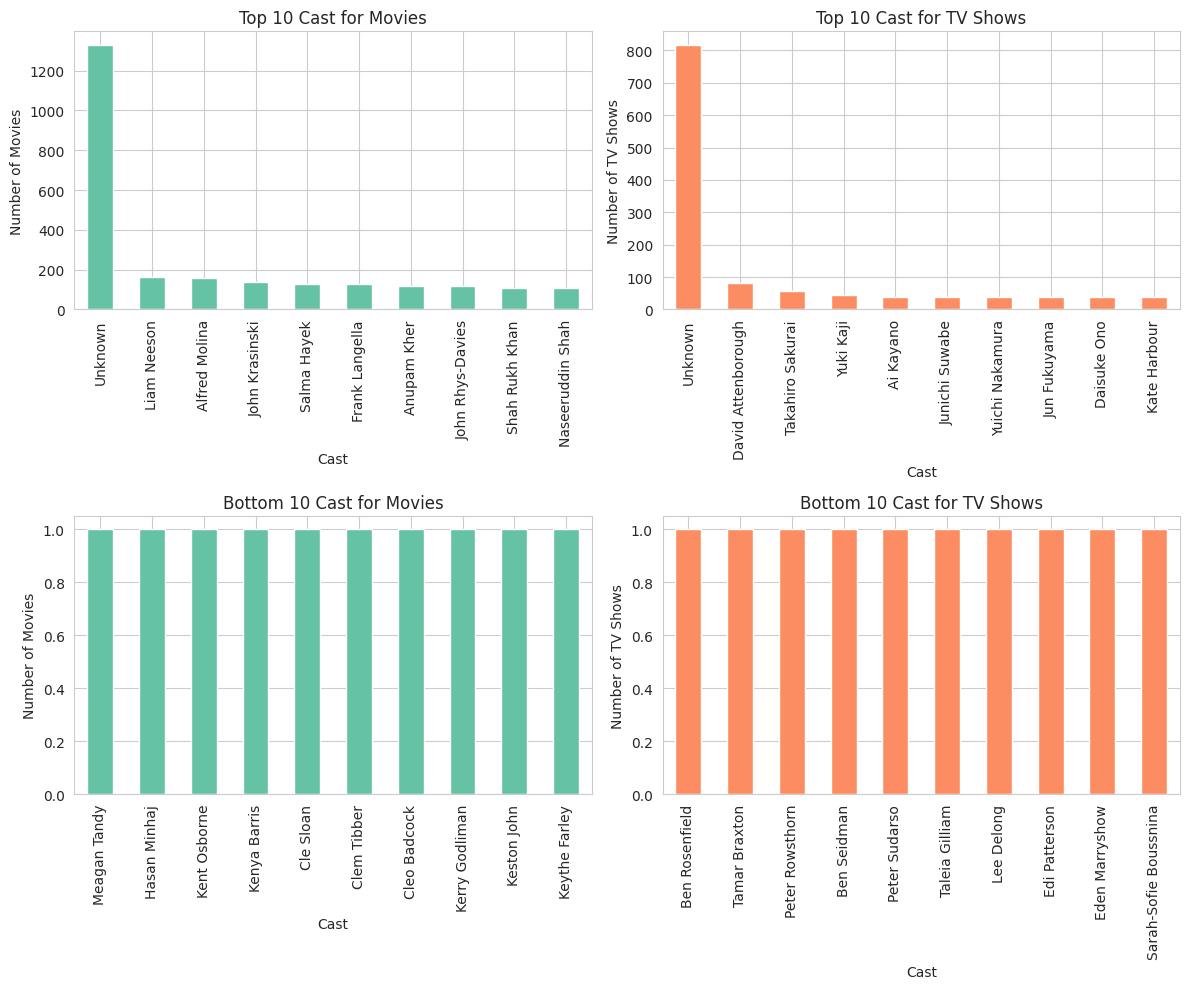

In [314]:
# Analysis of actors/cast of different types of shows/movies.

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted height for better fit
set2_colors = sns.color_palette('Set2', 2)

# Top 10 Cast for Movies
top10moviecast = df_final[df_final['type'] == 'Movie'].groupby('cast')['title'].count().sort_values(ascending=False).head(10)
top10moviecast.plot(kind='bar', color=set2_colors[0], ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Cast for Movies')
axes[0, 0].set_xlabel('Cast')
axes[0, 0].set_ylabel('Number of Movies')
axes[0, 0].tick_params(axis='x', rotation=90)
# Top 10 Cast for TV Shows
top10tvshowcast = df_final[df_final['type'] == 'TV Show'].groupby('cast')['title'].count().sort_values(ascending=False).head(10)
top10tvshowcast.plot(kind='bar', color=set2_colors[1], ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Cast for TV Shows')
axes[0, 1].set_xlabel('Cast')
axes[0, 1].set_ylabel('Number of TV Shows')
axes[0, 1].tick_params(axis='x', rotation=90)

# Bottom 10 Cast for Movies
bottom10moviecast = df_final[df_final['type'] == 'Movie'].groupby('cast')['title'].count().sort_values(ascending=False).tail(10)
bottom10moviecast.plot(kind='bar', color=set2_colors[0], ax=axes[1, 0])
axes[1, 0].set_title('Bottom 10 Cast for Movies')
axes[1, 0].set_xlabel('Cast')
axes[1, 0].set_ylabel('Number of Movies')
axes[1, 0].tick_params(axis='x', rotation=90)

# Bottom 10 Cast for TV Shows
bottom10tvshowcast = df_final[df_final['type'] == 'TV Show'].groupby('cast')['title'].count().sort_values(ascending=False).tail(10)
bottom10tvshowcast.plot(kind='bar', color=set2_colors[1], ax=axes[1, 1])
axes[1, 1].set_title('Bottom 10 Cast for TV Shows')
axes[1, 1].set_xlabel('Cast')
axes[1, 1].set_ylabel('Number of TV Shows')
axes[1, 1].tick_params(axis='x', rotation=90)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()


- Among the Data present, AnupamKher,Shahrukhkhan, Liam Neeson, Alfred Molina, John Krasinski, Salma Hayek appeared more in movies and David Attenborough, Takahiro sakurai, Yuki in Tv shows.

- And the directors like Martin Scorsees, Youssef chahine has more movies where as Noam,Murrah, Thomas has more Tv shows

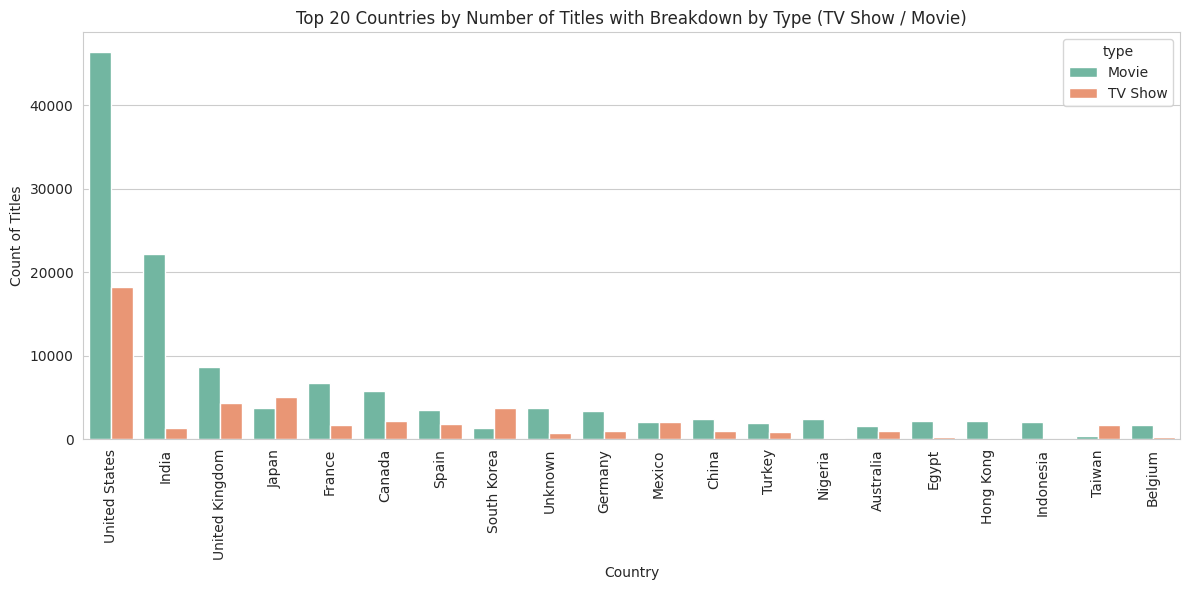

In [315]:
# Preparing data for the top 20 countries
top20_countries = df_final['country'].value_counts().head(20).index
df_top20 = df_final[df_final['country'].isin(top20_countries)]

# Plotting using seaborn to include hue based on 'type'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top20, x='country', hue='type', order=top20_countries, palette='Set2')
plt.title('Top 20 Countries by Number of Titles with Breakdown by Type (TV Show / Movie)')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count of Titles')
plt.tight_layout()
plt.show()


### **Correlation of content among different countries**

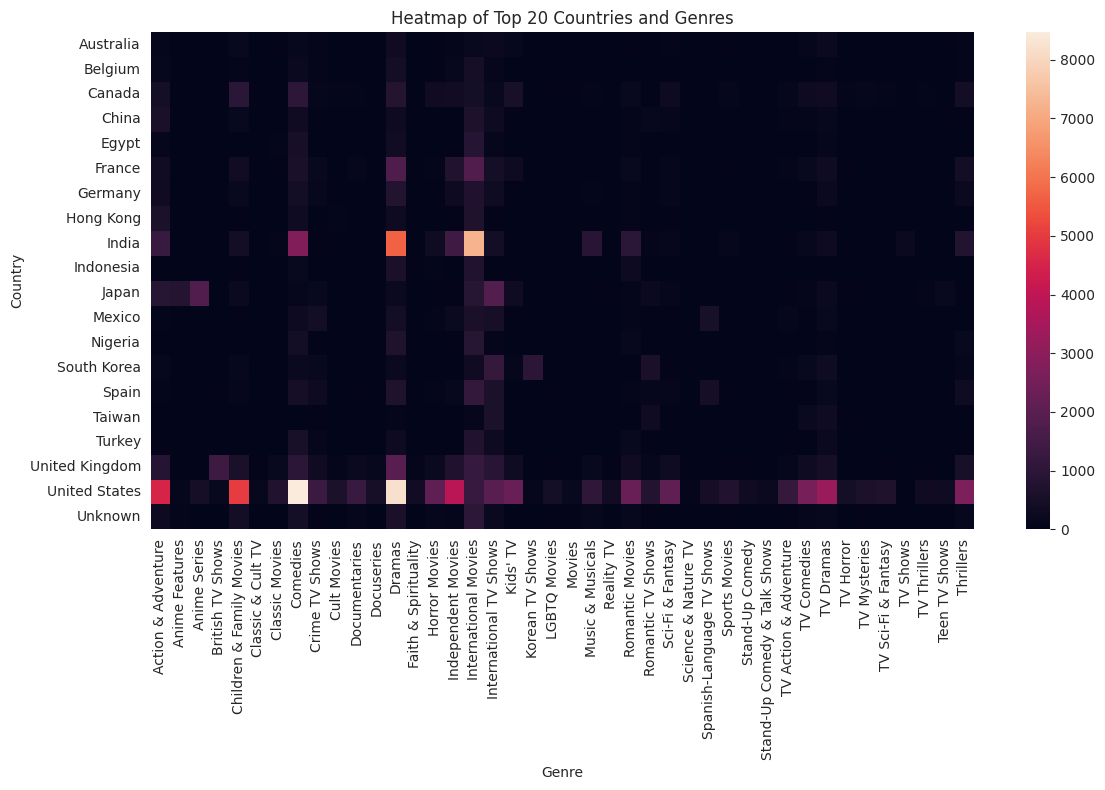

In [316]:
# Get the top 20 countries
top20_countries = df_final['country'].value_counts().head(20).index

# Filter data for the top 20 countries
df_top20 = df_final[df_final['country'].isin(top20_countries)]

# Create a pivot table with countries as rows, genres as columns, and counts of titles
country_genre_pivot = df_top20.pivot_table(index='country', columns='listed_in', values='title', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_genre_pivot, annot=False)

plt.title('Heatmap of Top 20 Countries and Genres')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


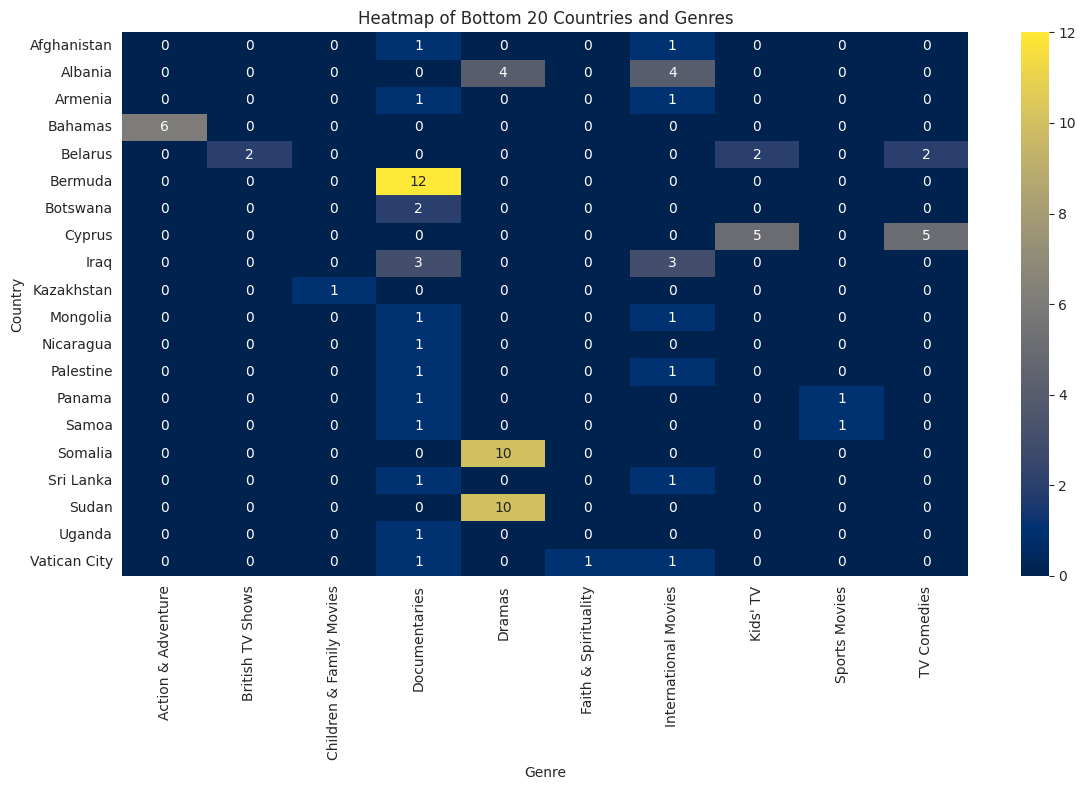

In [317]:
# Get the bottom 20 countries
bottom20_countries = df_final['country'].value_counts().tail(20).index

# Filter data for the top 20 countries
df_bottom20 = df_final[df_final['country'].isin(bottom20_countries)]

# Create a pivot table with countries as rows, genres as columns, and counts of titles
country_genre_pivot = df_bottom20.pivot_table(index='country', columns='listed_in', values='title', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_genre_pivot, cmap='cividis', annot=True)

plt.title('Heatmap of Bottom 20 Countries and Genres')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 - Popular genres across countries: Action & Adventure, Children & Family Movies, Comedies, Dramas, Internaonal Movies & TV Shows, TV Dramas, Thrillers
 - Country-speciﬁc genres: Korean TV shows (Korea), Brish TV Shows (UK), Anime features and Anime series (Japan), Spanish TV Shows (Argenna, Mexico and Spain)
 - United States and UK have a good mix of almost all genres
 - Maximum Internaonal movies are produced in India.


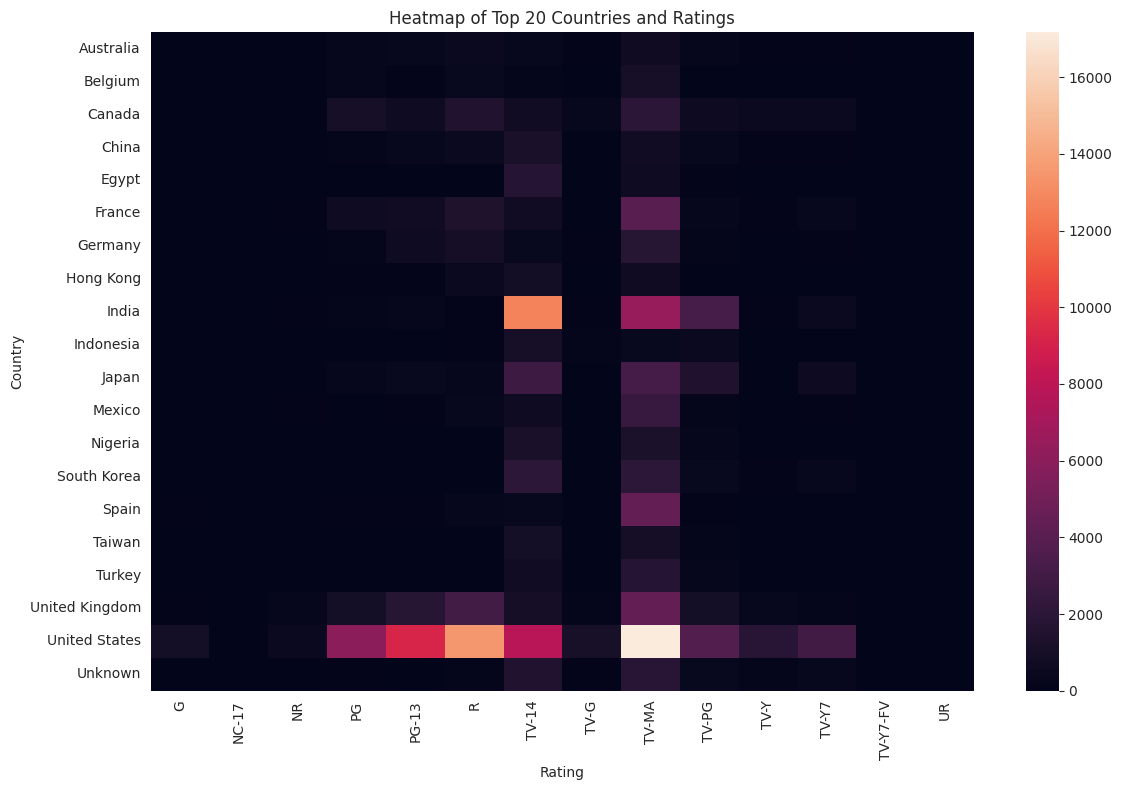

In [318]:
# Get the top 20 countries
top20_countries = df_final['country'].value_counts().head(20).index

# Filter data for the top 20 countries
df_top20 = df_final[df_final['country'].isin(top20_countries)]

# Create a pivot table with countries as rows, genres as columns, and counts of titles
country_rating_pivot = df_top20.pivot_table(index='country', columns='rating', values='title', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_rating_pivot, annot=False)

plt.title('Heatmap of Top 20 Countries and Ratings')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


- Netflix's content library is heavily dominated by adult-oriented shows and movies (TV-MA & TV-14) across all countries, indicating a focus on mature audiences and global demand for complex narratives.
  
- India has a notable amount of TV-PG content in addition to TV-MA & TV-14, reflecting the cultural demand for family-friendly entertainment and diverse viewing habits.

- Countries like the US, Canada, UK, France, and Japan offer more content for young audiences (TV-Y & TV-Y7), suggesting a strong market for children’s programming and family-focused viewership.

- There is a scarcity of general audience content (TV-G & G) across most countries, except for the US, highlighting an opportunity for Netflix to grow its family-friendly offerings globally.

### **Difference between release date and data added**

In [319]:
#Difference between release date and data added
df_final['diff_date'] = df_final['date_added'].dt.year - df_final['release_year']
import plotly.express as px

fig = px.histogram(df_final, x='diff_date', color='type', barmode='overlay',
                   labels={'diff_date': 'Year Difference', 'count': 'Count of Titles'},
                   title='Interactive Histogram of Year Differences by Type')
fig.update_layout(xaxis_title='Year Difference', yaxis_title='Count of Titles')
fig.show()


Most of the content has less year difference but this can be further decreased  and excitement range of movie or tv show can be capitalized for  more engagement

## **Business Insights:**

- **Content Release Year**:
  - The majority of Netflix content has been released after the year 2000.
  - Content from before 2000 is scarce, with potential to target senior citizens who may be interested in such content.

- **Content Ratings** (80% of content):
  - **TV-MA**: Intended for mature audiences aged 17 and above.
  - **TV-14**: Suitable for viewers aged 14 and above.
  - **TV-PG**: Parental guidance suggested (includes similar ratings like PG-13 and PG).
  - **R**: Restricted content, may not be suitable for viewers under 17.
  - This indicates Netflix primarily targets mature and adult audiences, while 20% of the content is designed for children under parental guidance.

- **Popular Genres**:
  - Top genres include International Movies, TV Shows, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Thrillers.

- **Country Contribution**:
  - Approximately 75% of Netflix content comes from the top 10 countries.
  - The remaining 25% is from other countries, highlighting an opportunity to expand content production from more regions.

- **Content Duration Trends**:
  - Viewership is increasingly leaning towards shorter-duration content (75 to 150 minutes for movies, 1 to 3 seasons for shows), suggesting a trend that can be considered for future content production.

- **Pandemic Impact**:
  - There was a noticeable drop in content production across all countries and types during 2020 and 2021, likely due to the COVID-19 pandemic.

## **Recommendations:**

- **Limited Focus on Genres in Most Countries (Except the US)**:
  - Netflix's current genre offerings seem to cater predominantly to the US and a few other countries.
  - Many countries, like India, may benefit from additional genres tailored to local preferences, such as Indian mythological content.
  - Expanding region-specific genres could create global appeal, much like the success of Japanese anime.

- **Country-Specific Insights**:
  - Content needs to be tailored to the demographics of each country.
  - Netflix can adjust content ratings according to the population distribution and preferences of individual countries.

- **India**:
  - The majority of content in India falls under three ratings: TV-MA, TV-14, and TV-PG.
  - This limited range is not likely to appeal to viewers under 14 or over 35, suggesting a need for content targeting younger and older audiences.

- **Japan**:
  - Japan's content is predominantly rated TV-MA, TV-14, and TV-PG, despite a large population aged 60 and above.
  - Increasing content for older audiences could capture this underserved demographic.

- **Scope for Audience Expansion**:
  - Netflix is primarily focused on mature audiences and children with parental guidance.
  - There is potential to expand content offerings for other groups, such as families, senior citizens, and children of various age groups.